In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [20]:
glob.glob("experiments/*/*/test_rollouts.npy")

['experiments/3pendulum/CHNN/test_rollouts.npy',
 'experiments/3pendulum/HNN/test_rollouts.npy',
 'experiments/3pendulum/LNN/test_rollouts.npy',
 'experiments/3pendulum/NN/test_rollouts.npy',
 'experiments/3pendulum/CHLC/test_rollouts.npy',
 'experiments/2pendulum/CHNN/test_rollouts.npy',
 'experiments/2pendulum/HNN/test_rollouts.npy',
 'experiments/2pendulum/LNN/test_rollouts.npy',
 'experiments/2pendulum/NN/test_rollouts.npy',
 'experiments/2pendulum/CHLC/test_rollouts.npy',
 'experiments/1pendulum/CHNN/test_rollouts.npy',
 'experiments/1pendulum/HNN/test_rollouts.npy',
 'experiments/1pendulum/LNN/test_rollouts.npy',
 'experiments/1pendulum/NN/test_rollouts.npy',
 'experiments/1pendulum/CHLC/test_rollouts.npy',
 'experiments/5pendulum/CHNN/test_rollouts.npy',
 'experiments/5pendulum/HNN/test_rollouts.npy',
 'experiments/5pendulum/LNN/test_rollouts.npy',
 'experiments/5pendulum/NN/test_rollouts.npy',
 'experiments/5pendulum/CHLC/test_rollouts.npy']

In [21]:
files = {"/".join(fname.split("/")[1:3]): fname for fname in glob.glob("experiments/*/*/test_rollouts.npy")}

In [22]:
files

{'3pendulum/CHNN': 'experiments/3pendulum/CHNN/test_rollouts.npy',
 '3pendulum/HNN': 'experiments/3pendulum/HNN/test_rollouts.npy',
 '3pendulum/LNN': 'experiments/3pendulum/LNN/test_rollouts.npy',
 '3pendulum/NN': 'experiments/3pendulum/NN/test_rollouts.npy',
 '3pendulum/CHLC': 'experiments/3pendulum/CHLC/test_rollouts.npy',
 '2pendulum/CHNN': 'experiments/2pendulum/CHNN/test_rollouts.npy',
 '2pendulum/HNN': 'experiments/2pendulum/HNN/test_rollouts.npy',
 '2pendulum/LNN': 'experiments/2pendulum/LNN/test_rollouts.npy',
 '2pendulum/NN': 'experiments/2pendulum/NN/test_rollouts.npy',
 '2pendulum/CHLC': 'experiments/2pendulum/CHLC/test_rollouts.npy',
 '1pendulum/CHNN': 'experiments/1pendulum/CHNN/test_rollouts.npy',
 '1pendulum/HNN': 'experiments/1pendulum/HNN/test_rollouts.npy',
 '1pendulum/LNN': 'experiments/1pendulum/LNN/test_rollouts.npy',
 '1pendulum/NN': 'experiments/1pendulum/NN/test_rollouts.npy',
 '1pendulum/CHLC': 'experiments/1pendulum/CHLC/test_rollouts.npy',
 '5pendulum/CHNN': 

In [23]:
avg_rel_errs = {k: np.load(file).mean(0)[..., 0] for k, file in files.items()}
import pandas as pd
df = pd.DataFrame(avg_rel_errs)

In [24]:
df = df.transpose()

def process_index(k):
    return tuple(k.split("/"))

df.index = pd.MultiIndex.from_tuples([process_index(k) for k,v in df.iterrows()])

df = df.transpose()

In [25]:
df = df.sort_index(level=0, axis=1)

In [26]:
df.head()

1pendulum                                                 2pendulum  \
           CHLC          CHNN       HNN       LNN        NN          CHLC   
0  1.221899e-17  2.297875e-17  0.000000  0.000000  0.000000  2.199891e-17   
1  2.437768e-04  1.611488e-05  0.013964  0.006872  0.007293  1.434962e-02   
2  4.874826e-04  3.266833e-05  0.027658  0.014005  0.014652  2.769137e-02   
3  7.323529e-04  4.957470e-05  0.041666  0.021257  0.022092  3.904091e-02   
4  9.736658e-04  6.709278e-05  0.055793  0.028654  0.029583  4.962202e-02   

                                                  3pendulum                    \
           CHNN       HNN       LNN        NN          CHLC          CHNN HNN   
0  1.775339e-17  0.000000  0.000000  0.000000  2.205591e-17  5.816045e-18 NaN   
1  1.991630e-03  0.026247  0.025725  0.024274  9.176448e-03  3.656414e-03 NaN   
2  3.880847e-03  0.054282  0.048882  0.047093  1.735213e-02  7.417943e-03 NaN   
3  5.507137e-03  0.083366  0.071802  0.069328  2.561965e-02  1.093391e-02 NaN   
4  7.153410e-03  0.111264  0.095999  0.090375  3.446365e-02  1.378509e-02 NaN   

                          5pendulum                                        
        LNN        NN          CHLC          CHNN HNN       LNN        NN  
0  0.000000  0.000000  2.498314e-17  1.404138e-17 NaN  0.000000  0.000000  
1  0.041336  0.037313  3.676741e-02  5.807452e-03 NaN  0.078426  0.071075  
2  0.081175  0.071721  7.080090e-02  1.096663e-02 NaN  0.147069  0.127391  
3  0.117337  0.102795  9.557689e-02  1.549257e-02 NaN  0.202852  0.173417  
4  0.146967  0.129745  1.327326e-01  1.992227e-02 NaN  0.251338  0.211025

[Text(0, 0.5, 'Average relative error')]

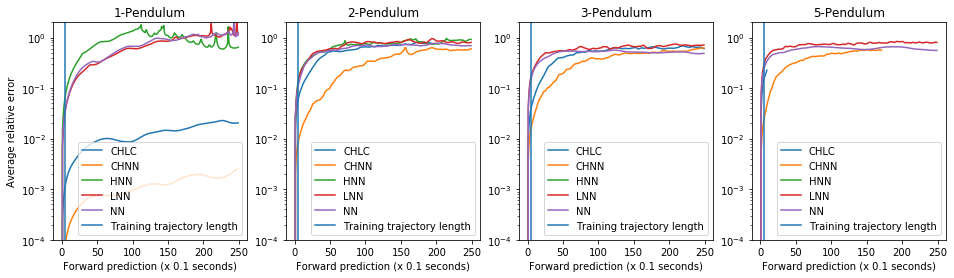

In [27]:
fig, axes = plt.subplots(ncols=4, figsize=(16, 4))

for system, ax in zip(df.columns.levels[0], axes.flatten()):
    df.loc[:, system].plot(ax=ax)
    ax.set(yscale="log",
           title=system[0] + "-" + "Pendulum",
           xlabel="Forward prediction (x 0.1 seconds)",
           #xlim=(-10, 100),
           ylim=(1e-4, 2))
    ax.axvline(5, label="Training trajectory length")
    ax.legend()
axes[0].set(ylabel="Average relative error")